# Exercise 5: Model selection, evaluation, and assessment


## Exercises

1. **k-Nearest Neighbors and Cross-Validation**
   - **Task**: Use cross-validation to evaluate the performance of a $k$-nearest neighbors (kNN) model trained on the Iris dataset. Vary the number of neighbors (for example, from $k = 1 $ to $k = 15$) and compare the resulting cross-validation scores.
     - **Questions**:
       1. Which value of $k$ gives the best performance?
       2. How does the value of $k$ affect the model’s bias and variance?
       3. When you examine the cross-validation scores, what do they tell you about the stability of the model for different $k$ values?

2. **Comparing Multiple Models with Accuracy and Confusion Matrix**
   - **Task**: Train different classification models on the Iris dataset (e.g., kNN, Decision Tree, Logistic Regression, etc.) and compare their performance using:
     - Accuracy
     - Confusion matrix
   - **Questions**:
     1. Which model achieves the highest accuracy?
     2. By looking at the confusion matrices for each model, can you identify which classes (species) are most often misclassified? 
     3. How does the confusion matrix give you deeper insight into the types of errors each model makes (e.g., mixing up similar classes)?

3. **k-Fold Cross-Validation with Multiple Models**
   - **Task**: Perform $k$-fold cross-validation on the Iris dataset and compare the performance of several models (e.g., kNN, Decision Trees, Logistic Regression, SVM).
   - **Questions**:
     1. Which model has the highest cross-validation accuracy on average?
     2. How does the cross-validation process help mitigate issues like overfitting and give a more reliable estimate of model performance?
     3. If two models have similar average performance, what additional criteria could you use to select one model over the other (e.g., interpretability, training time, etc.)?

4. **Hyperparameter Tuning with Decision Trees**
   - **Task**: Train a Decision Tree on the Iris dataset. Use `GridSearchCV` to find the best hyperparameters for `max_depth`, `min_samples_leaf`, and `min_samples_split`.
   - **Questions**:
     1. What is the model accuracy (on a held-out test set or via cross-validation) with the optimized hyperparameters?
     2. How do changes in hyperparameters (like `max_depth`) reflect the trade-off between underfitting and overfitting?
     3. Beyond accuracy, what other model outputs or diagnostics (e.g., feature importance) can help you interpret the model’s behavior and performance?

5. **ROC Curves and Precision-Recall Curves**
   - **Task**: Review the following links from scikit-learn documentation:
     - [Scikit-learn: ROC curves](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py)
     - [Scikit-learn: Precision-Recall](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#sphx-glr-auto-examples-model-selection-plot-precision-recall-py)
   - **Questions**:
     1. In a multiclass setting (like the Iris dataset), how can you adapt or interpret ROC and Precision-Recall curves? 
     2. What do the shapes of these curves tell you about the performance trade-offs at different decision thresholds?
     3. When might a Precision-Recall curve be more informative than a ROC curve, and vice versa? 
     4. How would you interpret the area under the curve (AUC) in the context of this (relatively balanced) dataset?

---

**Additional Interpretation and Discussion Points**:
- **Class Overlap**: Iris classes can sometimes overlap in feature space. Are there any insights in the misclassified examples that suggest the features used (e.g., petal length vs. sepal width) are not always sufficient to separate classes?
- **Practical Significance**: If the difference in performance between two models is very small, do you see any practical significance or can you justify choosing a simpler model for the sake of interpretability?
- **Error Analysis**: Look at misclassified samples for each model. Is there a consistent pattern in these misclassifications (e.g., Setosa being misclassified as Versicolor)? What might this indicate about the feature distribution or class similarities?

k=1: Cross-Validation Accuracy = 0.960
k=2: Cross-Validation Accuracy = 0.947
k=3: Cross-Validation Accuracy = 0.967
k=4: Cross-Validation Accuracy = 0.973
k=5: Cross-Validation Accuracy = 0.973
k=6: Cross-Validation Accuracy = 0.980
k=7: Cross-Validation Accuracy = 0.980
k=8: Cross-Validation Accuracy = 0.967
k=9: Cross-Validation Accuracy = 0.973
k=10: Cross-Validation Accuracy = 0.980
k=11: Cross-Validation Accuracy = 0.980
k=12: Cross-Validation Accuracy = 0.980
k=13: Cross-Validation Accuracy = 0.973
k=14: Cross-Validation Accuracy = 0.967


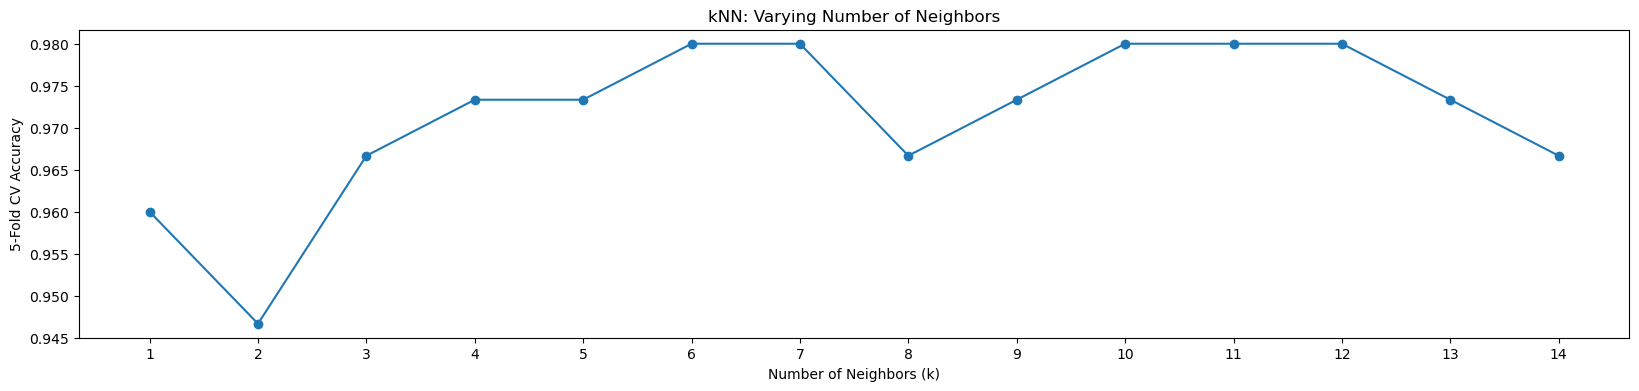

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Range of k values to test
k_values = range(1, 15)
cv_scores = []  # List to store average cross-validation scores

# Perform 5-fold cross-validation for each k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Using 5-fold cross validation
    scores = cross_val_score(knn, X, y, cv=5)
    cv_scores.append(scores.mean())
    print(f"k={k}: Cross-Validation Accuracy = {scores.mean():.3f}")

# Plot the cross-validation accuracy vs. k
plt.figure(figsize=(20, 4))
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('5-Fold CV Accuracy')
plt.title('kNN: Varying Number of Neighbors')
plt.xticks(k_values)
plt.show()


kNN (k=5)) Accuracy: 0.967
Confusion Matrix:
[[43  0  0]
 [ 0 38  1]
 [ 0  3 35]]



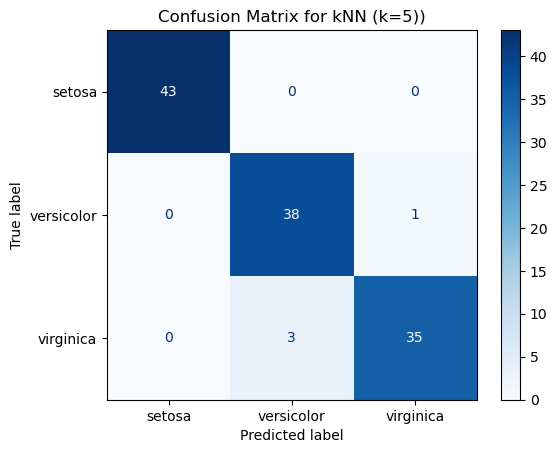

Decision Tree Accuracy: 0.933
Confusion Matrix:
[[43  0  0]
 [ 0 34  5]
 [ 0  3 35]]



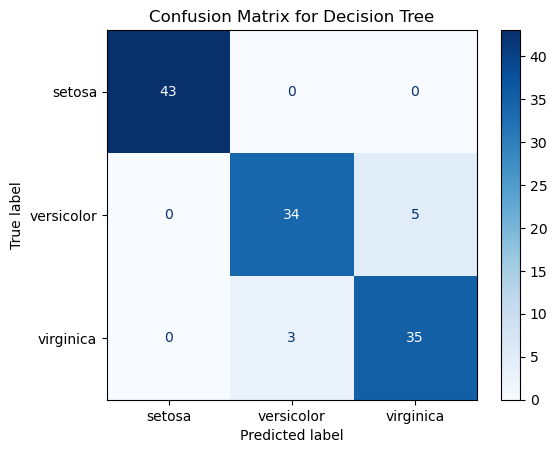

Logistic Regression Accuracy: 0.967
Confusion Matrix:
[[43  0  0]
 [ 0 36  3]
 [ 0  1 37]]



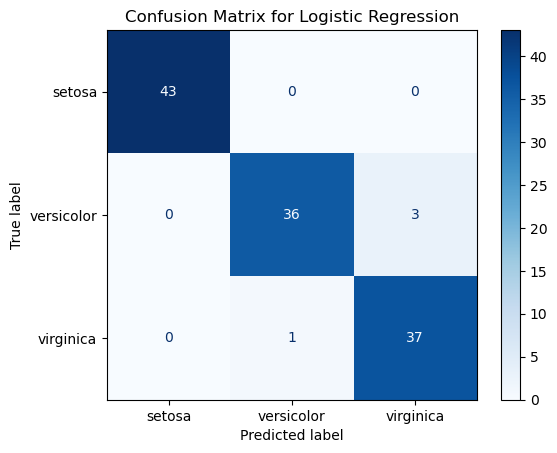

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Define models
models = {
    'kNN (k=5))': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=200, random_state=42)
}

results = {}

# Train, predict and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    results[name] = {'accuracy': acc, 'confusion_matrix': cm}
    print(f"{name} Accuracy: {acc:.3f}")
    print(f"Confusion Matrix:\n{cm}\n")
    
    # Display the confusion matrix using a heatmap
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {name}")
    plt.show()


kNN 5-Fold CV Accuracy: 0.980
Decision Tree 5-Fold CV Accuracy: 0.953
Logistic Regression 5-Fold CV Accuracy: 0.973
SVM 5-Fold CV Accuracy: 0.967


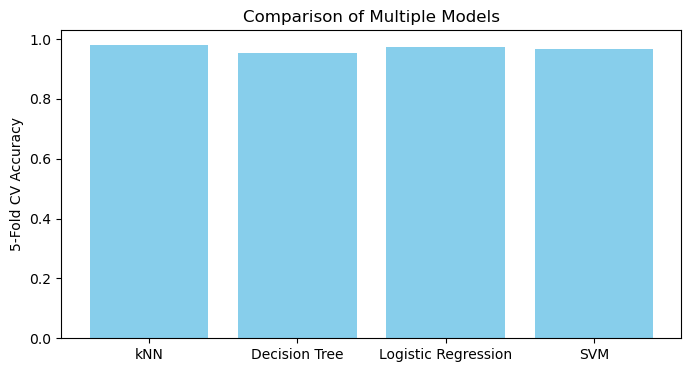

In [20]:
from sklearn.svm import SVC

# Define additional model: Support Vector Machine (SVM)
models_cv = {
    'kNN': KNeighborsClassifier(n_neighbors=10),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=200, random_state=42),
    'SVM': SVC(probability=True, random_state=42)
}

cv_results = {}

# Perform 5-fold cross-validation for each model
for name, model in models_cv.items():
    scores = cross_val_score(model, X, y, cv=5)
    cv_results[name] = scores.mean()
    print(f"{name} 5-Fold CV Accuracy: {scores.mean():.3f}")

# Optional: Display a bar plot of the results
plt.figure(figsize=(8, 4))
plt.bar(cv_results.keys(), cv_results.values(), color='skyblue')
plt.ylabel('5-Fold CV Accuracy')
plt.title('Comparison of Multiple Models')
plt.show()


In [4]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for the Decision Tree
param_grid = {
    'max_depth': [None, 2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4]
}

dtree = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Use the best estimator to compute feature importance
best_dtree = grid_search.best_estimator_
print("Feature Importances:", best_dtree.feature_importances_)


Best Hyperparameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.9733333333333334
Feature Importances: [0.         0.         0.58561555 0.41438445]
